<a href="https://colab.research.google.com/github/alberto1971/Curso-de-introduccion-a-Big-Data-Parte-3-nov2021/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: blue;'>SVM (SUPPORT VECTOR MACHINES)</h1>

SVM es un algoritmo de apredizaje supervisado muy popular y utilizado en machine learning en muchas aplicaciones 
(clasificación de emails, reconocimiento de imagenes, etc..). Su popularidad tadica en que es muy sencillo 
y relativamente potente porque tiene la posibilidad de utilizar kernels que le permiten encontrar patrones lineales o no lineales en los datos.

Puede usarse para regresión pero típicamente se utiliza como clasificador. 

En este capitulo veremos como utilizar SVM en scikit-learn. En [scikit-learn SVM](https://scikit-learn.org/stable/modules/svm.html) puedes encontrar toda la info de la librería sobre este algoritmo.


# 0. Cargamos las librerías necesarias

Cargamos todas las librerías de DataScience y configuramos matplot lib para que muestre las imagenes inline, ie. en la misma celda que la genera.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Generamos los datos

Para trabajar en la clasificación, vamos a generar los datos con la función [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

Generamos 50 muestras de puntos con 2 dimensiones que representan datos de dos clases que están bien separadas:

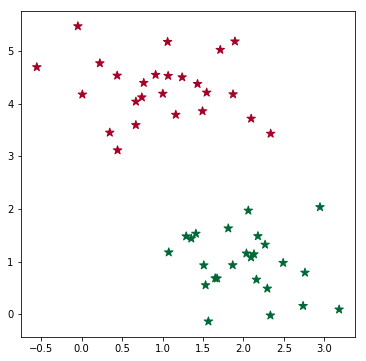

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn');

# 2. El algoritmo SVM

El clasificador SVM separa puntos de diferentes clases aprendiendo un hyperplano que cumple la propiedad de ser el hyperplano que los separa con mayor margen. Por ello se le denomina también al clasificador SVM, *clasificador lineal de mayor margen*. También se le denomina *clasificador discriminante* porque encuentra un hyperplano que discrimina o separa entre clases, a diferencia de otros clasificadores que parenden las distribuciones de cada clase y clasifican de acuerdo a estas, lo que serían *clasificadores generadores*.

Una vez aprendido este hyperplano en la fase de entrenamiento, podemos utilizarlo para hacer nuevas predicciones de clasificación de nuevos puntos.

Tomamos los datos generados, el clasificador svm puede aprender una recta de separación entre estas dos clases. Nosotros mismos podemos construir una recta de separación entre ambas, pero vemos inmediatamente que hay más de una solución.

Podemos construir tres hyperplanos (rectas, en este caso) que discriminen entre las dos clases. Dependiendo de la recta que elijamos un nuevo punto que caiga entre medio de estas tres rectas, va a ser clasificada de forma diferente, ¿cual es la optima?

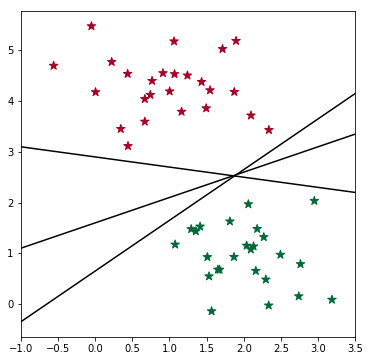

In [ ]:
x_linea = np.linspace(-1, 3.5)
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn');

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(x_linea, m * x_linea + b, '-k')

plt.xlim(-1, 3.5);

Evidentemente vemos que podemos mejorar el clasificador si construimos una recta que separe las clases con el mayor margen, para asegurar una separación máxima u optima.


## 2.1 Maximizando el *Margen*

SVM realiza precisamente esta operación, encontrar la linea que maximiza el margen de separacion entre las dos clases. Podemos pensar que lo que hace es que va construyendo líneas y calcula el margen o la anchura que hay desde la linea a las muestras más cercanas de cada clase

Por ejemplo, estos cálculos podrían ser los de la figura siguiente:

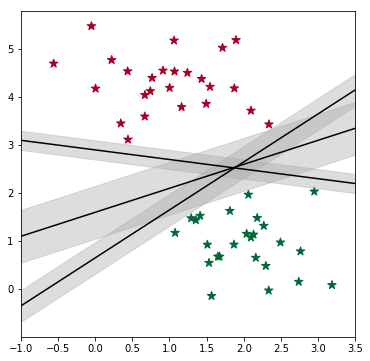

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn');

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    y_linea = m * x_linea + b
    plt.plot(x_linea, y_linea, '-k')
    plt.fill_between(x_linea, y_linea - d, y_linea + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

## 2.2 El modelo

En scikit-learn utilizamos la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) para el algoritmo dde clasificacion de SVM.

Entrenamos el modelo con los datos generados. Nuestro objetivo es encontrar la linea que separa ambas clases, así que por el momento utilizaremos el clasificador lineal $(kernel=lineal)$. Además buscamos una separación muy extricta, con el máximo margen, así que utilizaremos una constante $(C=1xE^{10})$ de penalización por errores en la clasificación muy alta.

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Los atributos del modelo una vez entrenado dan como resultado los __*vectores soporte_*__, que son las muestras que definen el margen de separacion de las clases y dan nombre a este algoritmo. El vector que define la recta encontrada se encuentra en __*coef_*__

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [ ]:
model.coef_

array([[ 0.23525694, -1.41250783]])

Para representar la gráfica del margen de separación utilizamos el codigo del ejemplo de [hiperplano en scikit-learn](
https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py) para crear una función de gráficos ad-hoc:

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        #if the model do not have support_vector_ param, set plot_sopport=False
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1,marker='o',edgecolor='black',facecolor='none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Ahora la utilizamos para hacer la gráfica de resultado del modelo:

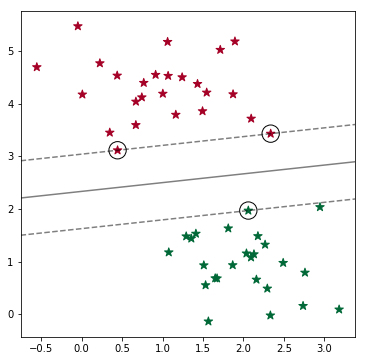

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn')
plot_svc_decision_function(model)

Una de las características importantes de este modelo es que solo los vectores soporte importan para definir el hiperplano. Si se añaden más muestras de entrenamiento que estén en el lado correcto del hiperplano y que no modifiquen el margen, el resultado no varía.

Probamos a generar diferentes numeros de muestras y comprueba los resultados. Utiliza un widget interactivo para generar la visualización:

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=N, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 20,30,40,50,51,60,100,150,200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 51, 60, 100, 150, 200), value=10), Output()), _dom_classes=('widget-interact',))

### 2.2.1 Modelo *SVC* y *LinearSVC*

ScikitLearn tiene también implementado otro algoritmo de clasificación SVC lineal.Es la clase [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) que es ligeramente diferente a la SVC genérica.

Los dos algoritmos optimizan el mismo problema pero funcionan de forma diferente y por lo tanto dan resultados diferentes. Las principales diferencias entre ambos son:

- LinearSVC está implementado con [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) que son unas librerías optimizadas para trabajar con conjuntos de datos muy grandes y suele ser más rapido. La funcion de coste por defecto es loss='double_hinge' y penaliza el término o parámetro constante en el hiperplano

- SVC lineal está implementado con [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) que son unas librerías optimizadas para trabajar con conjuntos de datos lineales o no lineales. La funcion de coste por defecto es loss='hinge'

Si no es el caso de que tenemos muchos datos, es mejor empezar probando la clase SVC. Pero hemos de ser conscientes de que cada algoritmo tiene su nicho, como se deduce del teorema de que 'no hay almuerzo gratis'.

Probamos la clase *LinearSVC* en este caso utilizando una funcion de coste como en el caso de *SVC* (loss='hinge'):

In [ ]:
from sklearn.svm import LinearSVC # "Support vector classifier"

linearmodel = LinearSVC(loss='hinge', C=1E10)
linearmodel.fit(X, y)

LinearSVC(C=10000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

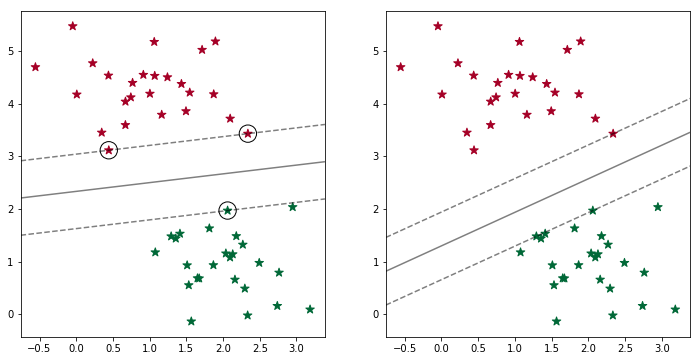

In [ ]:
fig=plt.figure(figsize=(12,6))

ax1= fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn')
plot_svc_decision_function(model, ax1)

ax2= fig.add_subplot(122)
ax2.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn')
# incluir plot_support=False porque el algortimo LinearSVC no tiene parámetro de vectores_supporte
plot_svc_decision_function(linearmodel, ax2, plot_support=False)

Como puede verse, los resultados son diferentes y en el caso de LinearSVC se penaliza el término o parámetro constante (el *intercept_* de la linea de división).

## 2.3 Ajuste del parámetro de error de clasificación

En las clasificaciones que hemos hecho hemos tenido un unas clases que estaban separadas. Si esto no es así, si no que los datos contienen ruido y las clases se mezclan, ¿que podemos hacer? ¿podemos encontrar ese hiperplano de discriminación? 

Veremos que sí, porque SVM es un algoritmo flexible que nos permite cometer algunos errores de clasificación y ampliar el margen de decisión para poder clasificar en las zonas de solape.

Generamos unos datos que se solapan:

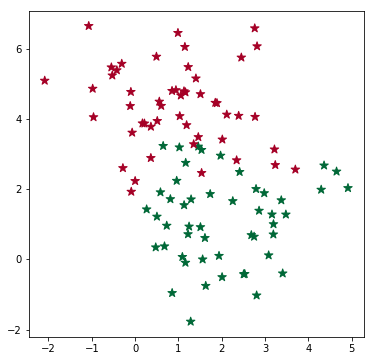

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn');

La implementación de SVM contiene un parámetro para relajar el requisito de ajuste con máximo margen. Se trata del __*parámetro de penalización del error de clasificación* C__. 

Si nosotros imponemos que todas las muestras deben de quedar fuera del margen, esto se denomina __*Clasificacion Fuerte*__ o __*de margen fuerte*__. En este caso el valor del parámetro C debe de ser muy alto dado que imponemos una penalización muy alta al error de clasificación. Este margen será pequeño, no habrá muestras en su interior mal clasificadas.

La cuestión la clasificación fuerte es que no funciona si los datos no son separables y que es muy sensible a valores espúreos de muestras que contienen ruido y se aproximan o se meten dentro de la otra clase (outliers).

Para evitar esto y permitir que las clases estén algo mezcladas es preferible utilizar un modelo más flexible. el objetivo es encontrar un buen balance entre tener el margen tan grande como podamos pero admitimos un numero limitado de muestras que quedan en su interior. Eso se denomina __*Clasificación Suave*__ o __*de margen suave*__.En este caso el valor del parámetro C es bajo e imponemos upoca penalización en errores de clasificación. Si C es bajo se permiten errores de clasificación, el margen es más amplio y puede haber muestras de entrenamiento en el.

Representemos los resultados de dos modelos de clasificación con diferentes valores de C (por ejemplo: 100.0 y 0.1):

num vectores soporte:  16
num vectores soporte:  32


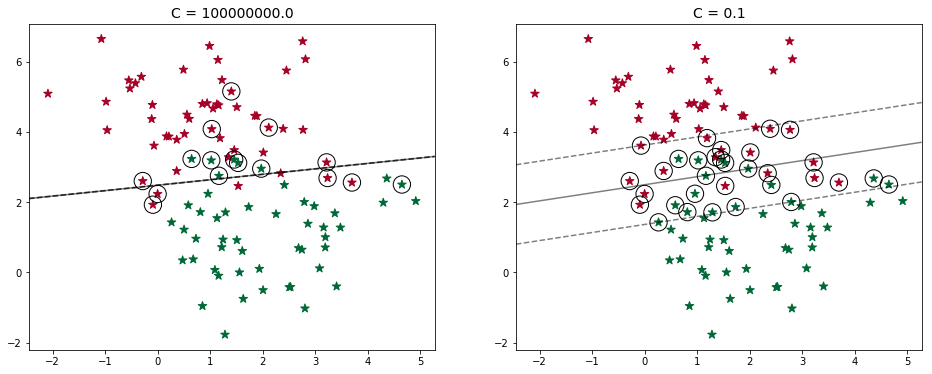

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for axi, C in zip(ax, [100000000.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, marker='*', s=80, cmap='RdYlGn');
    plot_svc_decision_function(model, axi)
    print('num vectores soporte: ',len(model.support_vectors_))
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## 2.4 Recomendaciones: Escalado de los datos

SVM es muy sensible al escalado de los datos. Si una de las variables tiene un rango de variación mucho mayor el maximo valor de margen seguirá esa direccion forzosamente. El clasificador elegirá un mejor hiperplano de discriminación si todas las variables están correctamente escaladas y no forzamos que elija una direccion determinada.

Generamos unos puntos que tienen en la componente de las ordenadas 10x mas escala que en la de las ordenadas. Veamos el resultado del algoritmo SVM sin aplicar escalado y tras aplicar escalado con con la transformacion de *StandardScaler*:

Text(0.5,1,'Escalados')

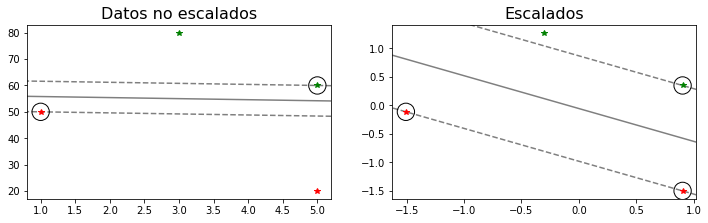

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf1 = SVC(kernel="linear", C=100).fit(Xs, ys)

fig = plt.figure(figsize=(12,3.2))
ax1 = fig.add_subplot(121)
ax1.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "g*")
ax1.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "r*")
plot_svc_decision_function(svm_clf1,ax1)
ax1.set_title("Datos no escalados", fontsize=16)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf2=SVC(kernel="linear", C=100).fit(X_scaled, ys)

ax2= fig.add_subplot(122)
ax2.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "g*")
ax2.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "r*")
plot_svc_decision_function(svm_clf2, ax2)
ax2.set_title("Escalados", fontsize=16)

# 3. Kernels

Aunque los clasificadores SVM son eficientes y trabajan sorprendentemente bien en mucho casos, muchos conjuntos de datos no son separables linearmente. Para solucionarlo podemos transformar o crear nuevas variables en los datos de entrenamiento que hagan que los datos sean separables.

Veamos un ejemplo. Generamos un conjunto de datos no separable linealmente con la función [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) de scikitlearn

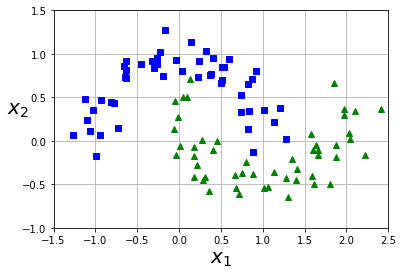

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## 3.1 Polinomico

Para trabajar con datos que siguen patrones no lineales una solución podría ser añadir variables polinomiales como vimos en el capítulo de la Regression. En muchos casos esto pruduce una transfomacion que hace separable linealmente los datos de entrenamiento.

Para ilustrar este caso creamos 1 conjunto de datos unidimensional y vemos que al añadir una variable que sea el polinomio grado dos de la variable original, podemos separar linealmente los datos:

[-4.5, 4.5, -1, 17]

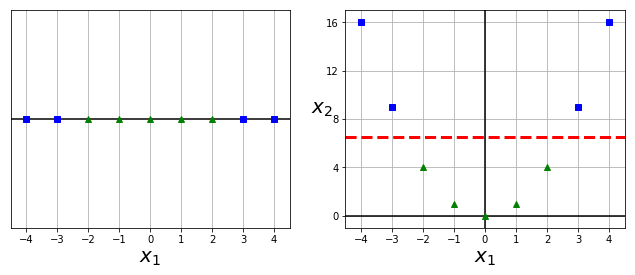

In [ ]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

Tomamos ahora nuestros detos no lineales de forma de lunas y aplicamos una transformación de polimio tres.

Hacemos un *Pipeline* tubería o proceso de datos que utiliza *PolynomialFeatures*, *StandarScaler* y el clasificador lineal *LinearSVC*.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        #warning - podemos incrementar max_iter de 1000 por defecto a 10000 para que converga
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=10000))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Representamos el contorno de separación de las dos clases:

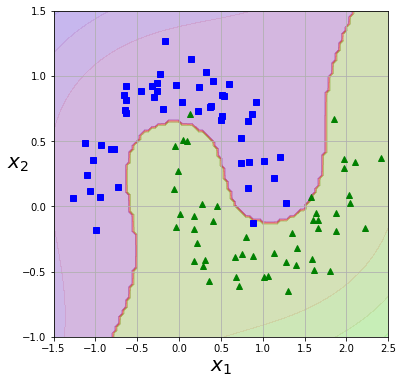

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(6, 6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### 3.2.1 Parámetros grado del polinomio y regularización

Añadir variables polinomicas puede ser simple de implementar y puede dar buenos resultados en muchos algoritmos de Machine Learning, no solo en SVM. La unica desventaja es que si se requieren polinomios de grado muy alto, se generan un numero elebado de variables y esto ralentiza el entrenamiento.

En SVM se utiliza una técnica que se llama __*Kernel*__ que hace posible obtener el mismo resultado que se se añadieran variables polinomicas, incluso de alto grado, sin tener que añadirlas. Eso evita que haya que crear un elevado numero de variables y se ralentice el algoritmo.

Creamos un clasificador SVC para nuestro conjunto de datos de las lunas que utiliza el *kernel=poli* y probamos crear polinomios de grado $d=3$ y $d=10$.

Si el modelo tiene un grado de polinomio demasiado alto se sobre-ajusta, para evitarlo tenemos el parámetro __*coef0*__ que actua como una regularización (r) y controla cuanto influencia la parte polinomial.
Utilizaremos baja regularización para polinomio de grado 3 $r=5$ y alta para el polinomio de grado 10, $r=100$.

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)


poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1000, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18);


Para ajustar los mejores hiperparámetros del modelo podemosutilizar la clase [gridsearch](). Lo recomendable es hacer una busqueda de parámetros a groso modo en un rango amplio y luego refinar la búsqueda en la zona en las que el modelo da mejores resultados.

## 3.2 Gausiano o Radio Basis Function (RBF)

Otro enfoque de transfomación de las varibles de entrada, sería poder establecer la para hacerlas separables sería añadir puntos de referencia que definan la separación y calcular nuevas variables que midan la proximidad a estos puntos de referencia.

Por ejemplo, para el caso anterior del conjunto de datos unidimensional, pordemos elegir dos puntos de referencia $p_1$ y $p_2$. Creamos una funcion que mida la proximidad a estos puntos utilizando. Esta puede ser la funcion de la campana de Gauss que es precisamente la que da nombre a este kernel, la función Gaussiana o también llamada Radial Basis Function (RBF). Por ejemplo, fijamos la desviación de la gausiana a $\gamma=0.3$.

Si tomamos ahora dos nuevas variables como la similitus a $p_1$ y $p_2$ respectivamente desde cada muestra con variable inicial $x_1$, tenemos una transformación en el espacio de variables que ahora si resulta ser un conjunto de datos separable linealmente.

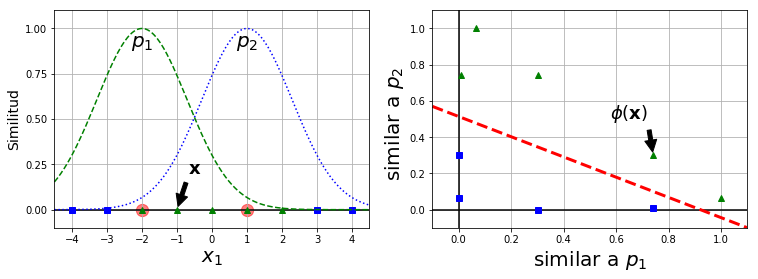

In [ ]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

gamma = 0.3
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similitud", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$p_1$", ha="center", fontsize=20)
plt.text(1, 0.9, "$p_2$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"similar a $p_1$", fontsize=20)
plt.ylabel(r"similar a $p_2$  ", fontsize=20, rotation=90)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

La transformación es una función que vale casi 1 si está muy proximo al punto de referencia y 0 si estás alejado. Esto da más peso a algunos puntos y consigue que el conjunto de datos sea separable linealmente.

Observamos la transformación de un punto con $x_1=-1.0$, por ejemplo:

In [ ]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


La cuestión es ¿como elegimos los puntos de referencia?. La solución más sencilla es crear un punto de referencia por cada muestra. Esto crea muchas dimensiones e incrementa las probabilidades de que los datos sean separables en algunas de ellas. 

Este método puede usarse con cualquier algoritmo de Machine Learning, pero el problema es que al final se generan tantas variables como muestras en el conjunto de datos de entrenamiento y esto puede ralentizar mucho la ejecución del algoritmo si el numero de datos es alto. 

Sin embargo al igual que en el caso polinómico, en SVM podemos utilizar el *kernel='rbf'*, que obtiene los mismos resultados que si hiciésemos esta transformación pero sin añadir realmente todo este número de variables de similitud.

Para ello hemos de usar este kernel para construir un modelo sobre los datos de las lunas:

In [ ]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

plt.figure(figsize=(6, 6))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

### 3.2.1 Parámetro $\gamma$

El kernel tiene el parámetro de similitud, que podemos ajustar a diferentes valores según queramos hacer más restrictiva o no la medida de similitud.

Hacer $\gamma$ grande hace que la campana sea estrecha y como consecuencia el entorno de influencia de cada muestra es pequeño. Cada muestra marca mucho su territorio. De forma que $\gamma$ alto tiende ha sobre-ajustar la solucion a las muestras de entrenamiento.

Por el contrario si  $\gamma$ pequeña la campana de Gaus será amplia y el entorno de influencia de cada muestra es grande. 

De esta forma $\gamma$ actua como un parámetro de regularización. Si el modelo sobreajuta convendrá reducirla para que entre todas las muestras se promedie mejor el resultado y el modelo generalice mejor. Y viceversa, si el modelo ajusta pobremente, deberemos incrementar $\gamma$.

Probamos el modelo con diferentes valores de $\gamma$ y de parámetro C:

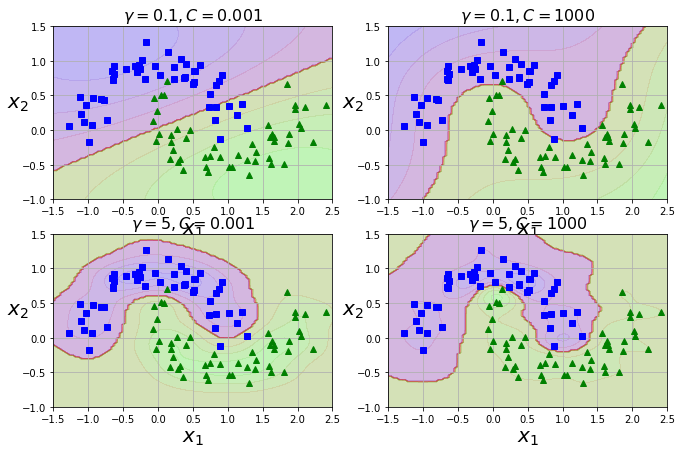

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)


Como podemos observar un $\gamma$ alto contribuye al sobre ajuste de los datos.

# 4. Diseño del algoritmo

Existen muchos tipos de kernels, como por ejemplo, kernels especiales para trabajar con texto o con ADN que funcionan con distancias de edicion (*distancia de Levenshtein*) y muchos otros.

La pregunta es entonces ¿que clasificador y que kernel debe de usarse en cada caso?:

- Si el conjunto de datos es grande (>100K muestras) suele resultar más eficiente utilizar LinearSVM

- Si el conjunto de datos es mas complejo y pequeño, debe utilizarse SVC con kernel gausiano (LinearSVC no soporta kernels)

- Si el conjunto de variables es alto comparado con el numero de datos, debe utilizarse SVC con kernel lineal, que está optimizado para trabajar con muchas variables